In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from rich.progress import track

%load_ext rich

In [4]:
elevation_string = """
abccccccccccccccccccaaaaaaaaacccccccccccccccccccccccccccccccccccccaaaa
abcccccccccccccccaaaaaaaaaaacccccccccccccccccccccccccccccccccccccaaaaa
abcaaccaacccccccccaaaaaaaaaacccccccccccccccccccccaaacccccccccccccaaaaa
abcaaaaaaccccccccaaaaaaaaaaaaacccccccccccccccccccaacccccccccccccaaaaaa
abcaaaaaacccaaacccccaaaaaaaaaaaccccccccccccccccccaaaccccccccccccccccaa
abaaaaaaacccaaaaccccaaaaaacaaaacccccccccccaaaacjjjacccccccccccccccccca
abaaaaaaaaccaaaaccccaaaaaaccccccaccccccccccaajjjjjkkcccccccccccccccccc
abaaaaaaaaccaaacccccccaaaccccccaaccccccccccajjjjjjkkkaaacccaaaccaccccc
abccaaacccccccccccccccaaccccaaaaaaaacccccccjjjjoookkkkaacccaaaaaaccccc
abcccaacccccccccccccccccccccaaaaaaaaccccccjjjjoooookkkkcccccaaaaaccccc
abcccccccaacccccccccccccccccccaaaacccccccijjjoooooookkkkccaaaaaaaccccc
abccaaccaaaccccccccccccccccccaaaaacccccciijjooouuuoppkkkkkaaaaaaaacccc
abccaaaaaaaccccccccccaaaaacccaacaaaccciiiiiooouuuuupppkkklllaaaaaacccc
abccaaaaaacccccccccccaaaaacccacccaaciiiiiiqooouuuuuupppkllllllacaccccc
abcccaaaaaaaacccccccaaaaaaccccaacaiiiiiqqqqoouuuxuuupppppplllllccccccc
abccaaaaaaaaaccaaaccaaaaaaccccaaaaiiiiqqqqqqttuxxxuuuppppppplllccccccc
abccaaaaaaaacccaaaaaaaaaaacccaaaahiiiqqqttttttuxxxxuuuvvpppplllccccccc
abcaaaaaaacccaaaaaaaaaaacccccaaaahhhqqqqtttttttxxxxuuvvvvvqqlllccccccc
abcccccaaaccaaaaaaaaaccccccccacaahhhqqqttttxxxxxxxyyyyyvvvqqlllccccccc
abcccccaaaccaaaaaaaacccccccccccaahhhqqqtttxxxxxxxyyyyyyvvqqqlllccccccc
SbcccccccccccaaaaaaaaaccccccccccchhhqqqtttxxxxEzzzyyyyvvvqqqmmlccccccc
abcccccccccccaaaaaaaacccaacccccccchhhppptttxxxxyyyyyvvvvqqqmmmcccccccc
abccccccccccaaaaaaaaaaccaacccccccchhhpppptttsxxyyyyyvvvqqqmmmccccccccc
abcaacccccccaaaaaaacaaaaaaccccccccchhhppppsswwyyyyyyyvvqqmmmmccccccccc
abaaaacccccccaccaaaccaaaaaaacccccccchhhpppsswwyywwyyyvvqqmmmddcccccccc
abaaaaccccccccccaaaccaaaaaaacccccccchhhpppsswwwwwwwwwvvqqqmmdddccccccc
abaaaacccccccccaaaccaaaaaaccccccccccgggpppsswwwwrrwwwwvrqqmmdddccccccc
abccccccaaaaaccaaaacaaaaaaccccccaacccggpppssswwsrrrwwwvrrqmmdddacccccc
abccccccaaaaaccaaaacccccaaccccaaaaaacggpppssssssrrrrrrrrrnmmdddaaccccc
abcccccaaaaaaccaaaccccccccccccaaaaaacggppossssssoorrrrrrrnnmdddacccccc
abcccccaaaaaaccccccccaaaaccccccaaaaacgggoooossoooonnnrrnnnnmddaaaacccc
abccccccaaaaaccccccccaaaacccccaaaaaccgggoooooooooonnnnnnnnndddaaaacccc
abccccccaaaccccccccccaaaacccccaaaaacccgggoooooooffennnnnnnedddaaaacccc
abcccccccccccccccccccaaacccccccaacccccggggffffffffeeeeeeeeeedaaacccccc
abccccccccccccccccccaaacccccaccaaccccccggfffffffffeeeeeeeeeecaaacccccc
abccccccccccccccccccaaaacccaaaaaaaaaccccfffffffaaaaaeeeeeecccccccccccc
abccccccccaacaaccccaaaaaacaaaaaaaaaaccccccccccaaaccaaaaccccccccccccccc
abccccccccaaaaacccaaaaaaaaaaacaaaaccccccccccccaaaccccaaccccccccccaaaca
abcccccccaaaaaccccaaaaaaaaaaacaaaaacccccccccccaaaccccccccccccccccaaaaa
abcccccccaaaaaacccaaaaaaaaaacaaaaaacccccccccccaaccccccccccccccccccaaaa
abcccccccccaaaaccaaaaaaaaaaaaaaccaaccccccccccccccccccccccccccccccaaaaa
""".strip().splitlines()

elevation = np.stack([np.array(list(line)) for line in elevation_string], axis=0)

start_point = np.argwhere(elevation == "S")[0]
end_point = np.argwhere(elevation == "E")[0]

elevation[tuple(start_point)] = "a"
elevation[tuple(end_point)] = "z"

elevation = elevation.view(np.int32) - ord("a")
elevation

array([[0, 1, 2, ..., 0, 0, 0],
       [0, 1, 2, ..., 0, 0, 0],
       [0, 1, 2, ..., 0, 0, 0],
       ...,
       [0, 1, 2, ..., 0, 0, 0],
       [0, 1, 2, ..., 0, 0, 0],
       [0, 1, 2, ..., 0, 0, 0]], dtype=int32)

<matplotlib.colorbar.Colorbar object at 0x7f67f5b72b60>

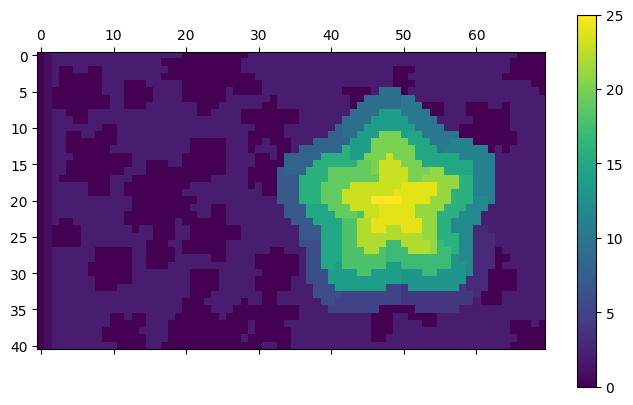

In [5]:
plt.matshow(elevation)
plt.colorbar()

In [18]:
# Left, Up, Right, Down
def apply_in_all_directions(arr, func):
    return np.stack(
        [np.rot90(func(np.rot90(arr, k=k)), k=-k) for k in range(4)],
        axis=-3,
    )


distance_in_directions = apply_in_all_directions(
    elevation, lambda arr: np.diff(arr, append=np.inf)
)

consume_from = distance_in_directions <= 1
consume_from

array([[[ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True, False],
        ...,
        [ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True, False]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False]],

       [[False,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        ...,
        [False,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True, False,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])

In [7]:
import itertools as it


def shift_left(array):
    result = np.empty_like(array)
    result[..., :-1] = array[..., 1:]
    result[..., -1] = np.inf
    return result


def repeated_application_until_fixed_point(func, arr):
    yield arr
    while ((next_arr := func(arr)) != arr).any():
        arr = next_arr
        yield arr


def expand_distances(distances):
    shifted_distances = apply_in_all_directions(distances, shift_left)
    valid_distances = np.where(consume_from, shifted_distances + 1, np.inf)
    return np.minimum(distances, valid_distances.min(axis=-3))


distances = np.full_like(elevation, np.inf, dtype=np.float32)
distances[(..., *end_point)] = 0.0

all_distances = list(
    repeated_application_until_fixed_point(expand_distances, distances)
)

distances = all_distances[-1]
distances

array([[364., 363., 362., ...,  inf,  inf,  inf],
       [363., 362., 361., ...,  inf,  inf,  inf],
       [364., 363., 362., ...,  inf,  inf,  inf],
       ...,
       [350., 349., 348., ...,  inf,  inf,  inf],
       [351., 350., 349., ...,  inf,  inf,  inf],
       [352., 351., 350., ...,  inf,  inf,  inf]], dtype=float32)

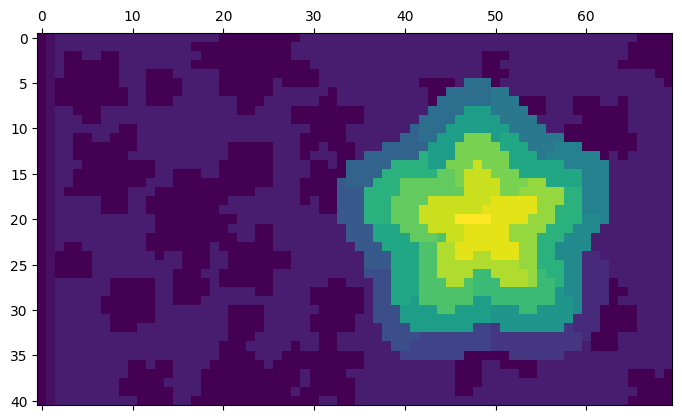

In [19]:
plt.matshow(elevation)

<matplotlib.colorbar.Colorbar object at 0x7f67f59d2b30>

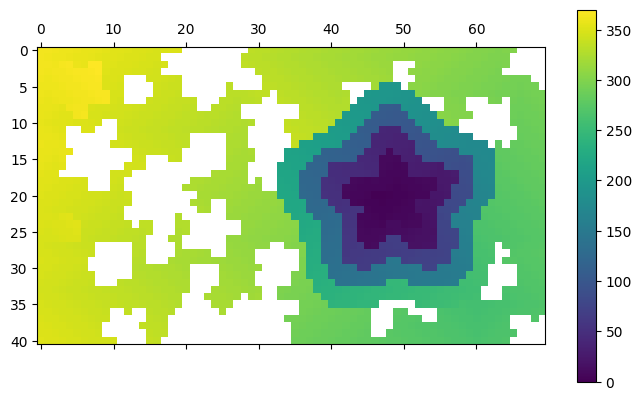

In [20]:
plt.matshow(distances)
plt.colorbar()

In [21]:
distances[(..., *start_point)]

array(352., dtype=float32)

In [22]:
take_step_in = {
    0: (0, 1),
    1: (1, 0),
    2: (0, -1),
    3: (-1, 0),
}


def take_step(current_position):
    current_distance = distances[(..., *current_position)]
    next_distances = shifted_distances[(..., *current_position)]
    valid_steps = np.where(
        next_distances - current_distance == -1, next_distances, np.inf
    )
    next_direction = np.argmin(valid_steps)
    if valid_steps[next_direction] == np.inf:
        return current_position

    return current_position + take_step_in[next_direction]


shifted_distances = apply_in_all_directions(distances, shift_left)
steps = list(repeated_application_until_fixed_point(take_step, start_point))
steps[:10]

[
    array([20,  0]),
    array([20,  1]),
    array([20,  2]),
    array([20,  3]),
    array([20,  4]),
    array([20,  5]),
    array([20,  6]),
    array([20,  7]),
    array([20,  8]),
    array([20,  9])
]

In [12]:
len(steps) - 1

352

In [13]:
distances[elevation == 0].min()

345.0

# Scalability?

In [40]:
import itertools as it

# Left, Up, Right, Down
def apply_in_all_directions(arr, func):
    return np.stack(
        [
            np.rot90(func(np.rot90(arr, k=k, axes=(-2, -1))), k=-k, axes=(-2, -1))
            for k in range(4)
        ],
        axis=-3,
    )


def shift_left(array):
    result = np.empty_like(array)
    result[..., :-1] = array[..., 1:]
    result[..., -1] = np.inf
    return result


def repeated_application_until_fixed_point(func, arr):
    yield arr
    while ((next_arr := func(arr)) != arr).any():
        arr = next_arr
        yield arr


def expand_distances(distances):
    shifted_distances = apply_in_all_directions(distances, shift_left)
    valid_distances = np.where(consume_from, shifted_distances + 1, np.inf)
    return np.minimum(distances, valid_distances.min(axis=-3))


def last_element(iterable):
    last = None
    for el in iterable:
        last = el

    return last


def solve_elevation_problem(elevation):
    distance_in_directions = apply_in_all_directions(
        elevation, lambda arr: np.diff(arr, append=np.inf)
    )
    consume_from = distance_in_directions <= 1

    distances = np.full_like(elevation, np.inf, dtype=np.float32)
    distances[(..., *end_point)] = 0.0

    return last_element(
        repeated_application_until_fixed_point(expand_distances, distances)
    )

In [29]:
%timeit solve_elevation_problem(elevation)

21.9 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
%timeit solve_elevation_problem(np.tile(elevation, (100, 1, 1)))

682 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%timeit solve_elevation_problem(np.tile(elevation, (1000, 1, 1)))

13.5 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
